<a href="https://colab.research.google.com/github/limruby/sentiment_analysis/blob/main/Sentiment_Analysis_SI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**


*   VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. Source : https://github.com/cjhutto/vaderSentiment





In [ ]:
#Install Library
!pip install vaderSentiment



*   Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
*   NLTK is a leading platform for building Python programs to work with human language data.






In [ ]:
# Import Library
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# **2. Import Data**

In [178]:
# Import data from Github
url = 'https://raw.githubusercontent.com/limruby/sentiment_analysis/main/data_2.csv'
df = pd.read_csv(url, sep=',', encoding = "ISO-8859-1")

In [179]:
df.head(5)

,ï»¿query_time,message,like_count
0,1/6/2021 16:56,Air Selangor has released the list of affected...,NaN
1,1/6/2021 16:58,When Bajet 2021 deliberated lingers around Cov...,6.0
2,1/6/2021 16:58,"Some heads within Air Selangor must roll, star...",3.0
3,1/6/2021 16:58,See.... You idiots spend more time on worrying...,1.0
4,1/6/2021 16:58,"Who knows, ""Accidents"" need to be created to g...",5.0


In [ ]:
df.shape

(95, 3)

# **3. PreProcessing**


### 1. Remove duplicate




In [ ]:
# Remove duplicate row from table
df = df.drop_duplicates()
df.shape

(95, 3)

###2. RemoveURL

In [180]:
# Remove Duplicate from selected column
df['message'] = df['message'].str.replace('http\S+|www.\S+', '', case=False)
df.message

0      Air Selangor has released the list of affected...
1      When Bajet 2021 deliberated lingers around Cov...
2      Some heads within Air Selangor must roll, star...
3      See.... You idiots spend more time on worrying...
4      Who knows, "Accidents" need to be created to g...
                             ...                        
101                 Never ending problem .. ð¡ð¡ð¡
102                                      Endless problem
103                           Tak berkompetent langsung.
104                                                  NaN
105                                              AGAIN? 
Name: message, Length: 106, dtype: object

###3. LowerCasing


In [181]:
# Change the message column into lowercase
df['message'] = df['message'].str.lower()
df.message

0      air selangor has released the list of affected...
1      when bajet 2021 deliberated lingers around cov...
2      some heads within air selangor must roll, star...
3      see.... you idiots spend more time on worrying...
4      who knows, "accidents" need to be created to g...
                             ...                        
101                 never ending problem .. ð¡ð¡ð¡
102                                      endless problem
103                           tak berkompetent langsung.
104                                                  NaN
105                                              again? 
Name: message, Length: 106, dtype: object

###Tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#Testing
example_text = df.iloc[0]
print(nltk.word_tokenize(example_text['message']))

['air', 'selangor', 'has', 'released', 'the', 'list', 'of', 'affected', 'area', '.', 'the', 'duration', 'of', 'the', 'water', 'disruption', 'is', 'still', 'unknown', '.', 'these', 'are', 'the', 'affected', 'areas', 'under', 'the', 'petaling', 'district', '.', 'for', 'the', 'full', 'list', ':']


In [177]:
def identify_tokens(row):
    message = row['message']
    tokens = nltk.word_tokenize(message)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words
    
df['message'] = df.apply(identify_tokens, axis=1)

TypeError: ignored

In [ ]:
df.message

0      [tolong, ye, update, complain, saya, da, bulan...
1      [tolong, ye, update, complain, saya, da, bulan...
2      [tolong, ye, update, complain, saya, da, bulan...
3      [tolong, ye, update, complain, saya, da, bulan...
4      [tolong, ye, update, complain, saya, da, bulan...
                             ...                        
100    [tolong, ye, update, complain, saya, da, bulan...
101    [tolong, ye, update, complain, saya, da, bulan...
102    [tolong, ye, update, complain, saya, da, bulan...
103    [tolong, ye, update, complain, saya, da, bulan...
105    [tolong, ye, update, complain, saya, da, bulan...
Name: message, Length: 95, dtype: object

In [ ]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [ ]:
my_list = ['frightening', 'frightened', 'frightens']
print ([stemming.stem(word) for word in my_list])

['frighten', 'frighten', 'frighten']


In [ ]:
def stem_list(row):
    my_list = row['message']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

In [ ]:
df['stemmed_words'] = df.apply(stem_list, axis=1)

In [ ]:
df.message

0      [tolong, ye, update, complain, saya, da, bulan...
1      [tolong, ye, update, complain, saya, da, bulan...
2      [tolong, ye, update, complain, saya, da, bulan...
3      [tolong, ye, update, complain, saya, da, bulan...
4      [tolong, ye, update, complain, saya, da, bulan...
                             ...                        
100    [tolong, ye, update, complain, saya, da, bulan...
101    [tolong, ye, update, complain, saya, da, bulan...
102    [tolong, ye, update, complain, saya, da, bulan...
103    [tolong, ye, update, complain, saya, da, bulan...
105    [tolong, ye, update, complain, saya, da, bulan...
Name: message, Length: 95, dtype: object

# **4. Sentiment Analysis**

###Get Subjectivity & polarity

In [ ]:
# Create a function to get subjectivity
def getSubjectivity(message):
  return TextBlob(message).sentiment.subjectivity

# Create a function to get polarity
def getPolarity(message):
  return TextBlob(message).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df ['message'].apply(getSubjectivity)
df['Polarity'] = df['message'].apply(getPolarity)

# Display data
df

TypeError: ignored

In [ ]:
# Change title to string
df['message'] = df['message'].astype(str)

In [ ]:
# import library for text analytics
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
listy = [] 
for index, row in df.iterrows():
  df['message']
  ss = sid.polarity_scores(row['message'])
  listy.append(ss)
  
se = pd.Series(listy)
df['sentiment'] = se.values
display(df.head(10))

,ï»¿created_time,message,sentiment
0,12/10/2020 11:55,we are delighted to announce that air selangor...,"{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp..."
1,12/11/2020 14:25,"congratulations ! however, please kindly look ...","{'neg': 0.102, 'neu': 0.54, 'pos': 0.358, 'com..."
2,12/10/2020 13:14,congratulations air selangor! with all the eff...,"{'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'comp..."
3,12/10/2020 14:18,congratulations air selangor! you surely deser...,"{'neg': 0.084, 'neu': 0.557, 'pos': 0.359, 'co..."
4,12/12/2020 11:41,"hi air selangor, congratulations for awarded b...","{'neg': 0.146, 'neu': 0.609, 'pos': 0.245, 'co..."
5,12/10/2020 13:17,you must be joking! though crisis management h...,"{'neg': 0.147, 'neu': 0.662, 'pos': 0.191, 'co..."
6,12/10/2020 17:09,its safe when you deliver less water... more w...,"{'neg': 0.103, 'neu': 0.373, 'pos': 0.524, 'co..."
7,12/10/2020 18:47,water is very brownish in taman seri manja are...,"{'neg': 0.135, 'neu': 0.786, 'pos': 0.079, 'co..."
8,12/12/2020 4:26,congratulations air selangor.. good job ðð...,"{'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compou..."
9,12/10/2020 13:25,thank you for doing the best for us! we know w...,"{'neg': 0.0, 'neu': 0.611, 'pos': 0.389, 'comp..."


###Compute Negative, Neutral and Positive Analysis

In [ ]:
# Function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Display data
df

KeyError: ignored

### Print Positive Comments

In [ ]:
# Print all positive comments
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ')'+sortedDF['message'][i])
    print()
    j=j+1

KeyError: ignored

### Print Negative Comments


In [ ]:
# Print all negative comments
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')'+sortedDF['message'][i])
    print()
    j=j+1

1)When Bajet 2021 deliberated lingers around Covid-19 prevention, EPF 10k, Moratorium, we can't see budget to overcome this problem. Oh this is caused by the kilang haram but tak berapa haram? We don't know. Maybe can tell your fellow Dun in Selangor that is now the MB, what can be done, as this is the blind spot unfolded by MPs and DUNs member ðââï¸

2)See.... You idiots spend more time on worrying about Najib instead of doing your own job. That's how useless you are. So obsessed with the former PM that you can't sleep without talking about him. Tapi Selangor takde air. Podah!

3)Its AA kpi to take back selangor, be careful of this snake.

4)Is this going to be our daily issue? This is 2020. We don't Yb to tell what happen? Tunggu dana? Tunggu lapuran... Semua di hujung jari dapat info... Catch the culprit & book him to the max penalty if possible just shoot them like in China. No time wasted. No lawyer service needed.

5)I will still support PH. I do know that this is F. Govt

### Visualization

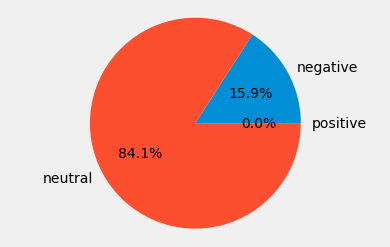

In [ ]:
# Pie Chart
import matplotlib.pyplot as plt
labels = ['negative', 'neutral', 'positive']
sizes  = [ss['neg'], ss['neu'], ss['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal') 
plt.show()

In [ ]:
# plot Word Cloud
allWords = ' '.join( [message for message in df['message']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

TypeError: ignored

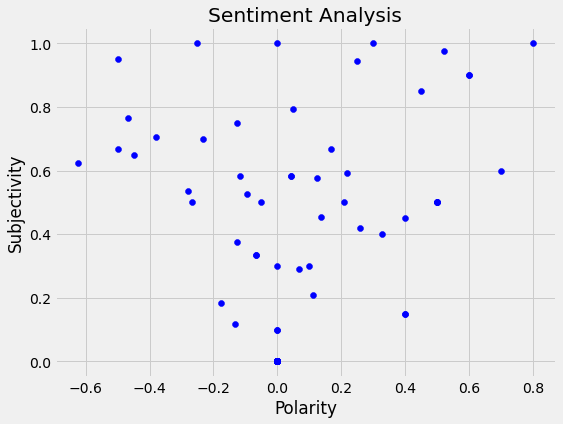

In [ ]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Show value counts

df['Analysis'].value_counts()

# Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show

KeyError: ignored

### Save to CSV

In [ ]:
df.to_csv('Output_File.csv', index=False)